In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
len(labels)

10

## Create AlexNet Achitecture

In [17]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters= 128 , kernel_size=(5, 5), strides= (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 2, 2, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 2, 2, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 2, 2, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,1

 Total params: 1,824,266 (6.96 MB)

 Trainable params: 1,821,962 (6.95 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [19]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs= 10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 93ms/step - accuracy: 0.3475 - loss: 1.8431 - val_accuracy: 0.3651 - val_loss: 1.8571
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 94ms/step - accuracy: 0.5460 - loss: 1.3015 - val_accuracy: 0.5520 - val_loss: 1.3087
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.6215 - loss: 1.1077 - val_accuracy: 0.4692 - val_loss: 1.9218
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.6736 - loss: 0.9708 - val_accuracy: 0.6199 - val_loss: 1.1455
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 94ms/step - accuracy: 0.7157 - loss: 0.8699 - val_accuracy: 0.6392 - val_loss: 1.0461
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.7399 - loss: 0.7838 - val_accuracy: 0.6850 - val_loss: 0.9323
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.7751 - loss: 0.6832 - val_accuracy: 0.7153 - val_loss: 0.8513
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 94ms/step - accuracy: 

#### Plot the history

TypeError: 'History' object is not subscriptable

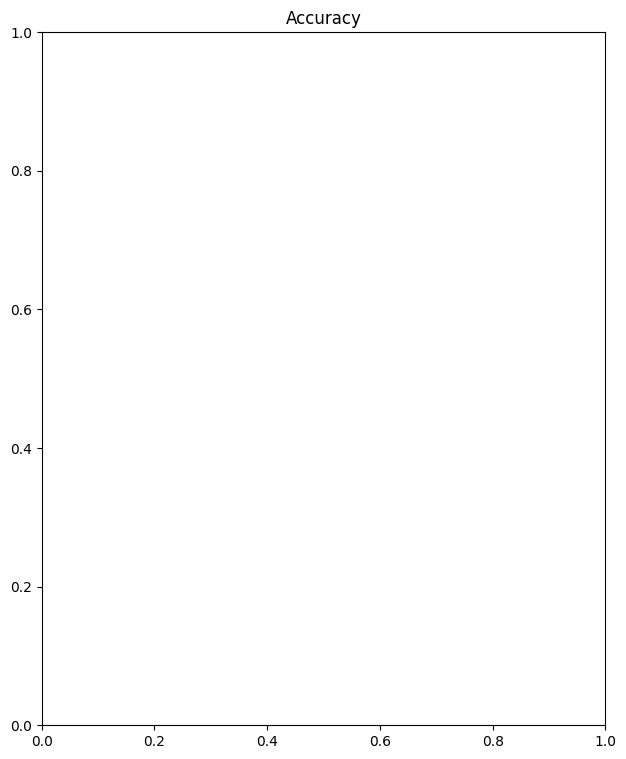

In [24]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(range(1,11), history['accuracy'], label ='Accuracy')
plt.plot(range(1,11), history['val_accuracy'], label ='Val_accuracy')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(range(1,11), history['loss'], label ='Loss')
plt.plot(range(1,11), history['val_loss'], label ='Val_Loss')
plt.legend()
plt.show()